# <div style= " text-align:center"> 연령대에 대한 연간소득의 관계 <br/><201904225 이수인></div>
    
# 1. 데이터에 대한 설명
기성세대에는 취업 후 일정 기간의 연봉을 모아 재산이 형성되는 과정이 있었습니다. 
20대에 기초 재산을 형성하기 시작하여 30~40대에 재산을 일정수준으로 끌어 올립니다. 
그러고 정년을 맞는 50대에 이르러서야 인생의 최대 재산을 증식할 수 있었지만,
현 시대에는 재산 형성의 방법이 정규 급여에만 국한되어 있지 않고 다양합니다. 
    
90년대에 비트 코인의 시대가 형성되며, 20세기 들어 비트코인(가상 화폐)의 현재 가치가 천만원대에 이르면서 
일순간에 부자가 되기도 하고, 나이와 상관없이 재산이 증식되며, 재산이 형성되는 과정이 달라졌습니다. 

이를 바탕으로 연령대별 재산증식,연간소득의 데이터를 가지고 어떤관계(의미있는관계, 무의미한 관계인지)에 대해 분석하는 것입니다.
    
# 2. 데이터 탐색 및 분석 포인트 설명
    
관계를 분석하기 위해 연간소득,나이,신용도 정보가 있는 신용카드 데이터를 이용하였습니다.
수업시간에 배운 내용을 토대로 분석하기 편리한 형태로 데이터를 전처리해보고, 
나이와 연간소득에 대한 상관분석을 하여 관계의 연관성에 대해 알아보면서, 이를 한눈에 보기 쉽게 히트맵과 산포도로 그려보는것이 분석 포인트 입니다.

그리고 연관성을 가지고 분석 할 수 있는 그 외의 데이터 몇가지를 사용하여,
수업시간에 배운 각각 다른 그래프로 그려보며 관계를 분석해보겠습니다. 
    

# 3. 데이터 분석 (전처리 및 정제, 시각화 등을 활용)

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('C:/Users/suin0/Programing/data/card/train.csv', index_col = 0)

In [3]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [5]:
# 필요없는 열 삭제

data = train.drop(['child_num', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'begin_month','DAYS_EMPLOYED'], axis = 1) 
data.head()

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,occyp_type,family_size,credit
index,,,,,,,,,,,,
0,F,N,N,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,NaN,2.0,1.0
1,F,N,Y,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,Laborers,3.0,1.0
2,M,Y,Y,450000.0,Working,Higher education,Married,House / apartment,-19087,Managers,2.0,2.0
3,F,N,Y,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,Sales staff,2.0,0.0
4,F,Y,Y,157500.0,State servant,Higher education,Married,House / apartment,-15037,Managers,2.0,2.0


In [6]:
# DAYS_BIRTH 데이터 변환

data['DAYS_BIRTH']

index
0       -13899
1       -11380
2       -19087
3       -15088
4       -15037
         ...  
26452   -12079
26453   -15291
26454   -10082
26455   -10145
26456   -19569
Name: DAYS_BIRTH, Length: 26457, dtype: int64

In [7]:
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH']/ 365).astype(int)
data['DAYS_BIRTH']

index
0        38
1        31
2        52
3        41
4        41
         ..
26452    33
26453    41
26454    27
26455    27
26456    53
Name: DAYS_BIRTH, Length: 26457, dtype: int32

In [8]:
# 열이름 변환

def a(col):
    return(
        str(col)
        .replace('edu_type','edu')
        .replace('family_type','marri')
        .replace('house_type','house')
        .replace('DAYS_BIRTH','age')
        .replace('occyp_type','job')
    )

data1 = data.rename(columns = a)
pd.Series(data1.columns)

0           gender
1              car
2          reality
3     income_total
4      income_type
5              edu
6            marri
7            house
8              age
9              job
10     family_size
11          credit
dtype: object

In [9]:
data1.isnull().sum()

gender             0
car                0
reality            0
income_total       0
income_type        0
edu                0
marri              0
house              0
age                0
job             8171
family_size        0
credit             0
dtype: int64

In [39]:
# 데이터 형식 변환

data1.info()

,gender,car,reality,income_total,income_type,edu,marri,house,age,job,family_size,credit
index,,,,,,,,,,,,
0,F,N,N,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38,NaN,2,1
1,F,N,Y,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31,Laborers,3,1
2,M,Y,Y,450000.0,Working,Higher education,Married,House / apartment,52,Managers,2,2
3,F,N,Y,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41,Sales staff,2,0
4,F,Y,Y,157500.0,State servant,Higher education,Married,House / apartment,41,Managers,2,2


In [13]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
income_total,26457.0,187306.524493,101878.367995,27000.0,121500.0,157500.0,225000.0,1575000.0
age,26457.0,43.213478,11.513590,21.0,34.0,42.0,53.0,68.0
family_size,26457.0,2.196848,0.916717,1.0,2.0,2.0,3.0,20.0
credit,26457.0,1.519560,0.702283,0.0,1.0,2.0,2.0,2.0


나이,가족규모, 신용도는 int8로 변환가능 /
연간소득 float32변환

In [14]:
data1['income_total'] = data1['income_total'].astype(np.float32)
data1['age'] = data1['age'].astype(np.int8)
data1['family_size'] = data1['family_size'].astype(np.int8)
data1['credit'] = data1['credit'].astype(np.int8)

In [15]:
#object형
data1.select_dtypes(include = ['object']).nunique()

gender          2
car             2
reality         2
income_type     5
edu             5
marri           5
house           6
job            18
dtype: int64

job 제외한 나머지 열은 카테고리형으로 변환

In [16]:
data1['gender'] = data1['gender'].astype('category')
data1['car'] = data1['car'].astype('category')
data1['reality'] = data1['reality'].astype('category')
data1['income_type'] = data1['income_type'].astype('category')
data1['edu'] = data1['edu'].astype('category')
data1['marri'] = data1['marri'].astype('category')
data1['house'] = data1['house'].astype('category')

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gender        26457 non-null  category
 1   car           26457 non-null  category
 2   reality       26457 non-null  category
 3   income_total  26457 non-null  float32 
 4   income_type   26457 non-null  category
 5   edu           26457 non-null  category
 6   marri         26457 non-null  category
 7   house         26457 non-null  category
 8   age           26457 non-null  int8    
 9   job           18286 non-null  object  
 10  family_size   26457 non-null  int8    
 11  credit        26457 non-null  int8    
dtypes: category(7), float32(1), int8(3), object(1)
memory usage: 776.2+ KB


In [18]:
#연간소득 기준 group by

(
data1[['income_total', 'age','family_size','job']]
.groupby('income_total', as_index=True)
.apply(lambda df: df.sort_values('age', ascending=True).head(1))
.droplevel(0)
.sort_values('income_total', ascending=False)
).head(10)

,income_total,age,family_size,job
index,,,,
1656,1575000.0,27,2,Managers
21697,1350000.0,35,2,Managers
18988,1125000.0,39,4,Managers
959,990000.0,62,2,Core staff
2862,945000.0,57,2,Managers
4413,900000.0,27,4,Managers
21195,810000.0,29,1,NaN
350,787500.0,47,2,Managers
6134,765000.0,33,3,Managers


In [89]:
# 고소득(상위 10% 중) 20대 남성

c1 = data1.age <30
c2 = (data1.income_total >= 742500) & (data1.income_total <= 1575000)
c3 = data1.gender == 'M'

c_final = c1 & c2 & c3

In [90]:
data1[c_final].head(10)

,gender,car,reality,income_total,income_type,edu,marri,house,age,job,family_size,credit
index,,,,,,,,,,,,
4413,M,Y,Y,900000.0,Commercial associate,Higher education,Married,House / apartment,27,Managers,4,2
10042,M,Y,Y,900000.0,Commercial associate,Higher education,Married,House / apartment,27,Managers,4,2
21195,M,Y,Y,810000.0,Commercial associate,Higher education,Single / not married,House / apartment,29,NaN,1,2
24356,M,Y,Y,900000.0,Commercial associate,Higher education,Married,House / apartment,27,Managers,4,0
25658,M,Y,Y,900000.0,Commercial associate,Higher education,Married,House / apartment,27,Managers,4,2


# 연속 열 비교

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 공분산 
data1.age.cov(data1.income_total)

-75081.52639605576

In [21]:
# 상관계수
data1.age.corr(data1.income_total)

-0.06400889818284614

<AxesSubplot:>

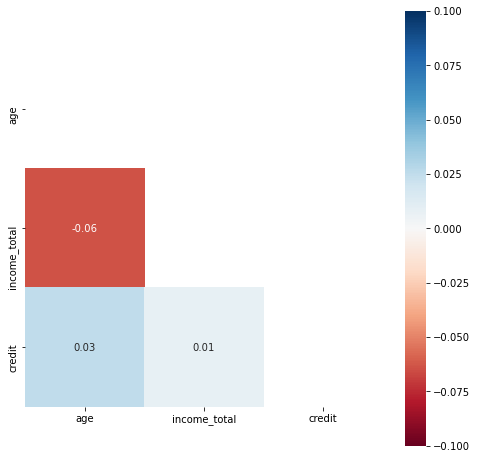

In [91]:
#히트맵

fig, ax = plt.subplots(figsize=(8, 8))
corr = data1[['age', 'income_total','credit']].corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(
 corr,
 mask=mask,
 fmt='.2f', 
 annot=True,
 ax=ax,
 cmap='RdBu',
 vmin=-0.1, 
 vmax=0.1,  
 square=True
)

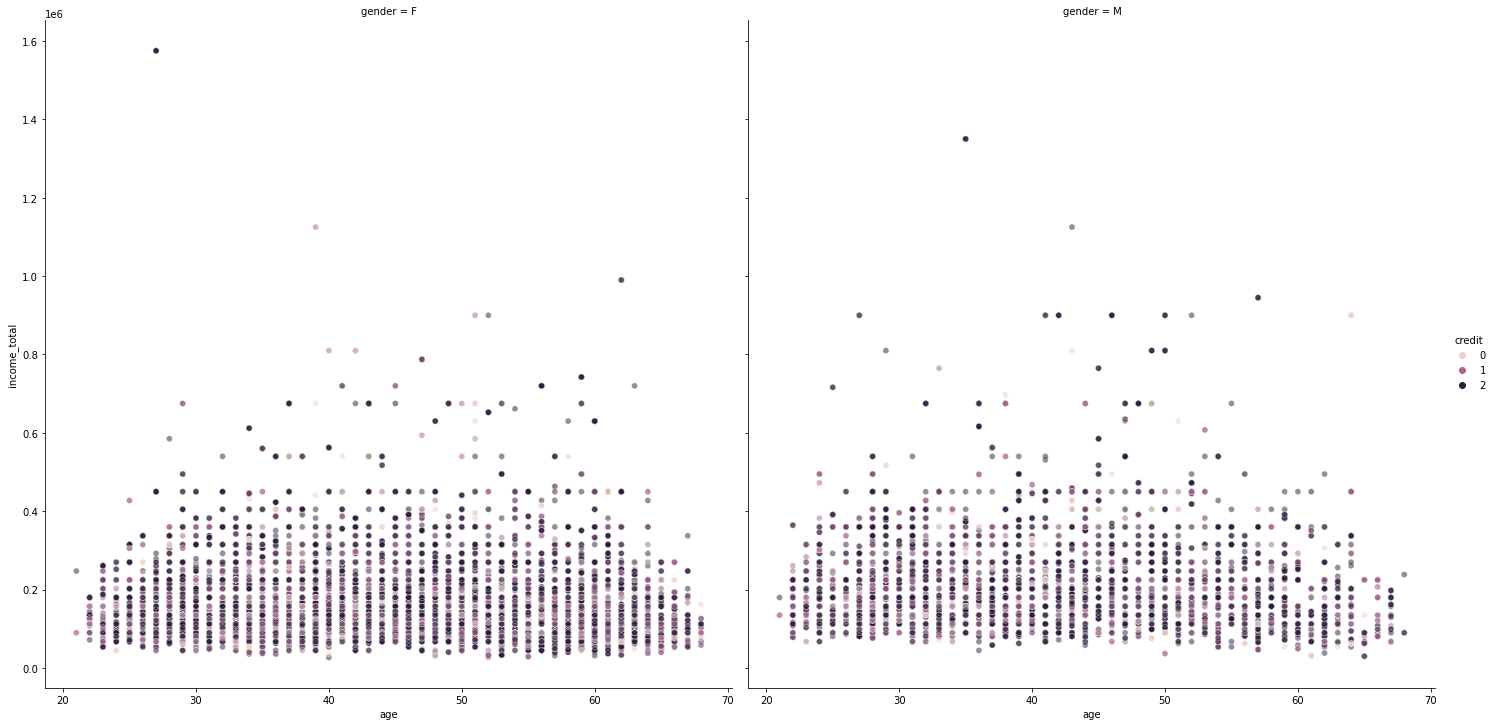

In [23]:
#산포도

sns.relplot(
 x='age', 
 y='income_total',
 data= data1,
    
 hue='credit',
 alpha=.5,
 height=10,
 col='gender'
)

# 범주간 연속값을 비교한 박스플롯

In [24]:
data1.job.value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: job, dtype: int64

In [25]:
mask = data1.job.isin(['Laborers', 'Core staff', 'Sales staff', 'Managers','Drivers'])

data1[mask].groupby('job').income_total.agg(['mean', 'std','max'])

,mean,std,max
job,,,
Core staff,191473.625000,99885.835316,990000.0
Drivers,210853.718750,92309.354726,900000.0
Laborers,180307.187500,74596.477666,900000.0
Managers,278735.250000,159836.485698,1575000.0
Sales staff,174955.578125,85311.270584,697500.0


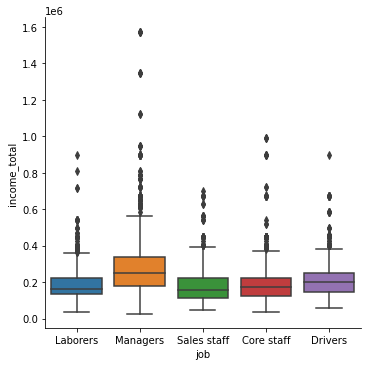

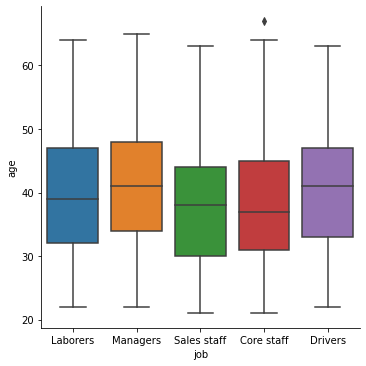

In [75]:
sns.catplot(x='job', y='income_total', data=data1[mask], kind='box') #직업별 연간소득
sns.catplot(x='job', y='age', data=data1[mask], kind='box') #직업별 나이

# 두개의 범주형 열 비교한 막대그래프

In [30]:
pd.crosstab(data1.house, data1.credit)

credit,0,1,2
house,,,
Co-op apartment,14,30,66
House / apartment,2873,5569,15211
Municipal apartment,110,160,548
Office apartment,24,48,118
Rented apartment,50,147,232
With parents,151,313,793


<AxesSubplot:xlabel='house'>

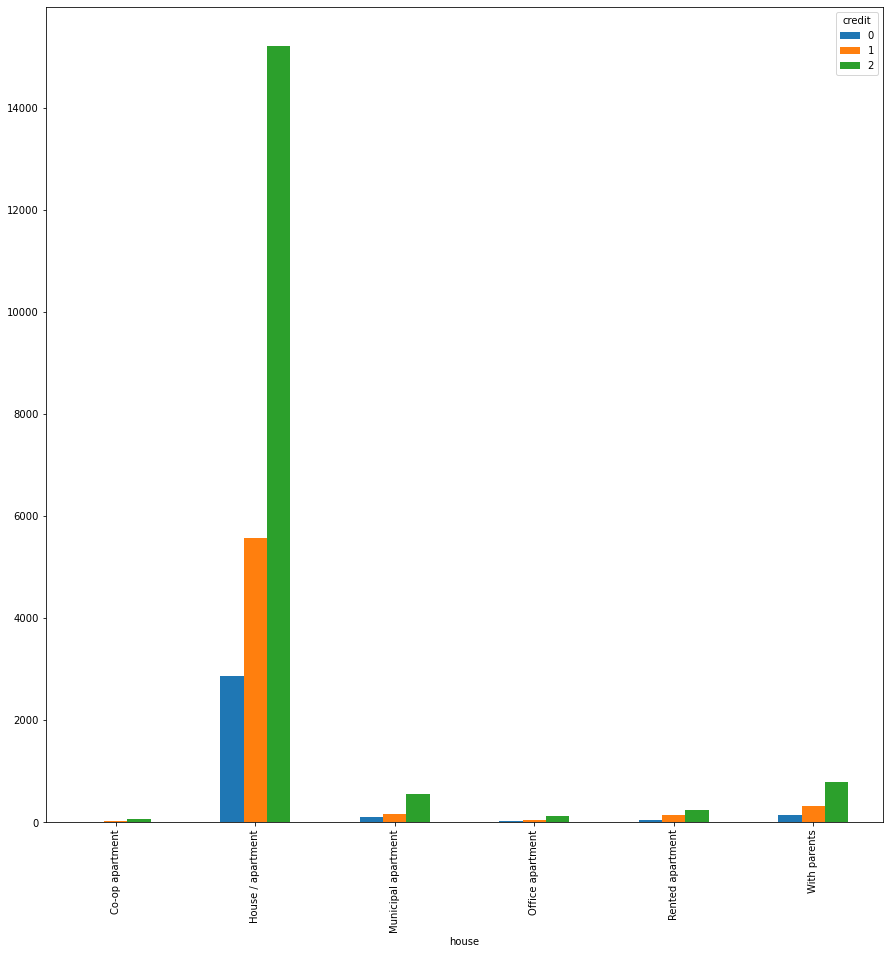

In [106]:
fig, ax = plt.subplots(figsize=(15, 15))
(
 data1.pipe(lambda df_: pd.crosstab(df_.house, df_.credit))
 .plot.bar(ax=ax)
)

# 4. 의미 해석 및 가치 도출

연간소득을 기준으로한 group by의 결과를 보면, 상위 10명 안에 젊은 층 20대가 3명이나 차지하는 결과를 볼 수 있다.
그 중 불리언 조건을 사용하여 행필터링을 해본 결과에서도 고소득 상위 10% 중 20대 남성 데이터를 가져온 결과 총 5개의 데이터나 있는 것을 확인 할 수 있었다.
연간소득과 나이 두개의 연속 열의 관계를 비교하기 위해 공분산을 보면 큰 음의 값(-75081)을 가졌고, 상관계수를 보면 -0.06이라는 상당히 약한 음의 관계를 가졌다. 산포도로 봤을때도 무의미하게 골고루 섞인 점들을 볼 수 있다.
위의 결과를 합하여 결론을 내면 나이와 연간소득의 관계는 큰 의미가 없이 고소득층에서도 20대 비율이 많다. 
처음 데이터를 설명하며 예측했던 결론이랑 같은 결과가 나왔다. 
현시대는 재산증식 방법이 다양해졌으니 연간소득과 나이의 관계는 상관이 없다는 뜻이다.

나이와 연간소득 외의 직업별 연간소득, 직업별 나이 관계를 박스플롯으로 보면 경영.관리자 직업이 연간소득이 제일 높았다.
직업별 나이는 비슷비슷하지만 경영.관리자 직업이 조금 더 높은결과를 볼 수 있었다.
경영.관리 직업이 연령층이 높아도 할 수 있고, 소득이 높다는 결론을 추측할 수 있는 결과였다.

거쥬유형과 신용도 두 범주형 열비교를 막대그래프로 보면 주택/아파트가 월등히 높은 결과를 볼 수 있다.
신용도 상관없이 요즘은 주택/아파트에 주로 산다는것을 알 수 있는 결과였다.
